In [1]:
from sympy import *
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction
from scipy.optimize import LinearConstraint
from scipy.optimize import Bounds

# Вариант 18
A = 36

a1 = 1/2

a2 = 0.25

w1 = 5

w2 = 6

I = 100

U = A * (x^a1) * (y^a2)

U1 = A * x^a1 * y^a2 - w1*x - w2*y

In [2]:
def input_data():
    try:
        Q = input("Производственная функция  Q(x,y) = ")
        A = int(input("A = "))
        a1 = input("a1 = ")
        a2 = input("a2 = ")
        w1 = int(input("Стоимость единицы первого ресурса (w1) = "))
        w2 = int(input("Стоимость единицы второго ресурса (w2) = "))
        I = int(input("Бюджетное ограничение на ресурсы (I) = "))
        a1 = float(Fraction(a1))
        a2 = float(Fraction(a2))
        
    except ValueError:
        print("Ошибка ввода!")
        return None
    except KeyboardInterrupt:
        print("Прервано пользователем")
        return None
    return (Q,A,a1,a2,w1,w2,I)

def check_data(varible):
    try:
        sympify(varible)
    except SympifyError:
        print("Неверный ввод")
        return False
    return True

In [3]:
my_functions = input_data()

if my_functions != None:
    result_of_check = check_data(my_functions[0])
    if result_of_check != False:
        print("Данные верны.")
    else:
        print("Ошибка! Повторите попытку ввода!")
else:
    print("Ошибка! Повторите попытку ввода!")

Производственная функция  Q(x,y) = A * (x^a1) * (y^a2)
A = 36
a1 = 1/2
a2 = 0.25
Стоимость единицы первого ресурса (w1) = 5
Стоимость единицы второго ресурса (w2) = 6
Бюджетное ограничение на ресурсы (I) = 100
Данные верны.


In [6]:
type_list = [type(i) for i in [Q,A,a1,a2,w1,w2,I]]
type_list

[str, int, float, float, int, int, int]

In [7]:
U_E = sympify(Q)
U_E = U_E.subs([("A", A), ("a1", a1), ("a2", a2)])
U_E

36*x**0.5*y**0.25

In [8]:
U = 'A * x^a1 * y^a2 - w1*x - w2*y'
U_E_1 = sympify(U)
U_E_1 = U_E_1.subs([("A", A), ("a1", a1), ("a2", a2), ("w1", w1), ("w2", w2)])
U_E_1

36*x**0.5*y**0.25 - 5*x - 6*y

In [9]:
#x>=0.001; y>=0.001
bounds = Bounds([0.001, 0.001], [np.inf, np.inf])
bounds

Bounds([0.001, 0.001], [inf, inf])

In [10]:
#0.01<= 5*x + 6*y <= 100
linear_constraint = LinearConstraint([[w1, w2]], [0.01], [I])
linear_constraint

Оптимизация с ограничениями

In [12]:
result = optimize.minimize(lambda x: -lambdify(["x", "y"], U_E_1)(x[0], x[1]), x0=(1,1), 
                        method='trust-constr',
                       bounds=bounds, constraints=linear_constraint)
result

 barrier_parameter: 2.048000000000001e-09
 barrier_tolerance: 2.048000000000001e-09
          cg_niter: 75
      cg_stop_cond: 4
            constr: [array([99.99999997]), array([13.33333327,  5.5555556 ])]
       constr_nfev: [0, 0]
       constr_nhev: [0, 0]
       constr_njev: [0, 0]
    constr_penalty: 1.0
  constr_violation: 0.0
    execution_time: 0.3663139343261719
               fun: -101.81513964706753
              grad: array([-2.56806766, -3.08168082])
               jac: [array([[5, 6]]), array([[1., 0.],
       [0., 1.]])]
   lagrangian_grad: array([-1.81995216e-07,  1.51662681e-07])
           message: '`xtol` termination condition is satisfied.'
            method: 'tr_interior_point'
              nfev: 195
              nhev: 0
               nit: 72
             niter: 72
              njev: 65
        optimality: 1.819952158165728e-07
            status: 2
           success: True
         tr_radius: 4.9000000000000025e-09
                 v: [array([0.5136135]), ar

In [13]:
x_max, y_max, extremum = result.x[0], result.x[1], -result.fun

In [14]:
print(f'Extremum: {extremum} \nOptimal plan(Xmax, Ymax): {x_max, y_max}')

Extremum: 101.81513964706753 
Optimal plan(Xmax, Ymax): (13.333333274021093, 5.555555600496557)


#### Оптимизация без ограничений

In [16]:
result_2 = optimize.minimize(lambda x: -lambdify(["x", "y"], U_E_1)(x[0], x[1]), x0=(1,1), 
                             method="BFGS")
result_2

      fun: -174.95999999858282
 hess_inv: array([[42.18918408, 11.57362914],
       [11.57362914,  9.75650528]])
      jac: array([0.00000000e+00, 7.62939453e-06])
  message: 'Optimization terminated successfully.'
     nfev: 54
      nit: 17
     njev: 18
   status: 0
  success: True
        x: array([69.98433509, 29.1601253 ])

In [17]:
x_max_2, y_max_2, extremum_2 = result_2.x[0], result_2.x[1], -result.fun

In [18]:
print(f'Extremum2: {extremum_2} \nOptimal plan2(Xmax2, Ymax2): {x_max_2, y_max_2}')

Extremum2: 101.81513964706753 
Optimal plan2(Xmax2, Ymax2): (69.98433508536249, 29.16012530240483)


In [19]:
def draw_matplot_lib():
    plt.figure()
    ax = plt.figure().add_subplot(projection='3d')
    x = np.linspace(0, x_max)
    y = np.linspace(0, y_max)
    X, Y = np.meshgrid(x, y)
    Z = lambdify(['x', 'y'], U_E_1)(X, Y)

    ax.view_init(20, -150)
    ax.plot_surface(Y, X, Z,rstride = 1, cstride = 1, alpha = 1, cmap = 'viridis')
    plt.xlabel("X")
    plt.ylabel("Y")
    ax.invert_xaxis()

<Figure size 432x288 with 0 Axes>

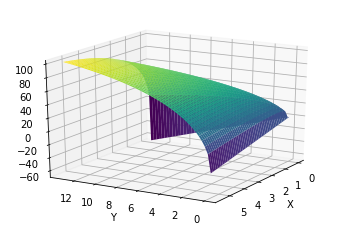

In [20]:
draw_matplot_lib()

In [21]:
def draw_contour():
    delta = 0.15
    x = np.arange(0, 12 * x_max, delta)
    y = np.arange(0, 12 * y_max, delta)
    X, Y = np.meshgrid(x, y)
    z = lambdify(["x", "y"], U_E_1)(X, Y)
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, z, levels = (40, 60, 75, 85, extremum), colors = ("blue", "gray", "brown", "black", "red"))
    ax.clabel(CS, inline=True, fontsize=10)
    x = np.linspace(0, (I/w1))
    y_treug = (I - w1 * x) / w2
    y_2 = 0
    fig2 = ax.fill_between(x, y_2, y_treug)
    fig2.set_facecolor('green')
    fig.set_figwidth(7)
    fig.set_figheight(7)
    plt.title("Карта изоквант")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.plot(x_max, y_max, marker="o", markersize=5, markeredgecolor="black", markerfacecolor="black")
    plt.text(x_max + 20,y_max + 2,f'M*{int(x_max), int(y_max)}',horizontalalignment='right', color="black")
    plt.plot(x_max_2, y_max_2, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
    plt.text(x_max_2 + 5,y_max_2 + 2,f'{int(extremum)}',horizontalalignment='right', color="red", fontsize=12)
    plt.show()

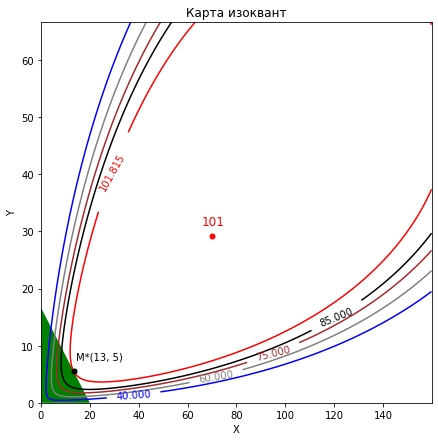

In [22]:
draw_contour()

In [23]:
print(f'Максимальная прибыль = {int(extremum)} \nОптимальный план = {int(x_max), int(y_max)}')

Максимальная прибыль = 101 
Оптимальный план = (13, 5)
